# Определение перспективного тарифа для телеком-компании


# Шаг 1. Открыть файл с данными и изучить общую информацию

In [64]:
#импортируем необходимые для проекта библиотеки Python
import pandas as pd
import math 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from functools import reduce
from scipy import stats as st


In [65]:
#ознакомимся с данными приведеными в 5 таблицах
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [66]:
#информация о пользователях
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [67]:
#информация о звонках
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [68]:
#информация об интернет-сессиях
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [69]:
#информация о сообщениях
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [70]:
#информация о тарифах
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Описание тарифов**

**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Посмотрим на общую информацию о таблицах количестве строк, столбцов и типах данных.** 

**Таблица users (информация о пользователях):**
 
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

In [71]:
#пользователи
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Таблица calls (информация о звонках):**
 
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

In [72]:
#звонки
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Таблица internet (информация об интернет-сессиях):**
 
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

In [73]:
#интернет
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**Таблица tariffs (информация о тарифах):**
 
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [74]:
#тарифы
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Таблица messages (информация о сообщениях):**
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

In [75]:
#сообщения
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Из полученных таблиц сразу видно, что имеются проблемы с датами, указанными как вещественный тип данных. Длительность звонка в минутах и скаченный траффик нужно изменить, привести к целочисленному виду и округлить в большую сторону, как этого требует оператор.

# Шаг 2. Предобработка данных

In [76]:
#из дано известно, что "Мегалайн" всегда округляет секунды до минут
#duration — длительность звонка в минутах - из дано длительность уже в минутах занчит надо избавиться от дробной части
calls['duration'] = calls['duration'].apply(np.ceil).astype(int)

In [77]:
#churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
#для красоты заменим пропуски 0 
users['churn_date'] = users['churn_date'].fillna(0)

In [78]:
#во всех таблицах, где есть дата, приведем ее к типу  datetime
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'],format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d')

In [79]:
#из дано известно, что "Мегалайн" всегда округляет мегабайты в гигобайты, но для начала округлим до целых чисел мегабайты
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype(int)

**Подсчет параметров для каждого пользователя**

- количество сделанных звонков и израсходованных минут разговора по месяцам

In [80]:
#Создадим сводную таблицу в которой будут отражены звонки и минуты для каждого пользователя по месяцам
#Преобразуем время в месяцы
calls['month'] = calls['call_date'].dt.month  
calls_in_month = calls.pivot_table(
    index = ['user_id', 'month'], values = ['duration'], aggfunc = ['count','sum'])
calls_in_month.columns = ['calls', 'duration']
calls_in_month

calls  duration
user_id month                 
1000    5         22       159
        6         43       172
        7         47       340
        8         52       408
        9         58       466
...              ...       ...
1498    10        41       247
1499    9          9        70
        10        68       449
        11        74       612
        12        69       492

[3174 rows x 2 columns]

- количество отправленных сообщений по месяцам

In [81]:
#создадим сводную таблицу с сообщениями по месяцам
messages['month'] = messages['message_date'].dt.month  
message_in_month = messages.pivot_table(
    index = ['user_id', 'month'], values = ['id'], aggfunc = ['count'])
message_in_month.columns = ['messages']
message_in_month

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
...                 ...
1498    10           42
1499    9            11
        10           48
        11           59
        12           66

[2717 rows x 1 columns]

- объем израсходованного интернет-трафика по месяцам;

In [82]:
#создадим сводную таблицу с интернет-трафиком по месяцам
internet['month'] = internet['session_date'].dt.month  
internet_in_month = internet.pivot_table(
    index = ['user_id', 'month'], values = ['mb_used'], aggfunc = 'sum')
internet_in_month.columns = ['mb_used']
internet_in_month

mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581
...                ...
1498    10       20604
1499    9         1848
        10       17809
        11       17984
        12       13077

[3203 rows x 1 columns]

- посчитаем помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [83]:
#для удобства в исходной таблице добавим месяц по которому потом будем группировать данные
users['month'] = users['reg_date'].dt.month

#объеденим звонки, минуты, количество смс и трафик для каждого пользователя, а также добавим тарифный план
df = calls_in_month.merge(message_in_month,  on=['user_id', 'month'], how='outer')
df = df.merge(internet_in_month,  on=['user_id', 'month'], how='outer')
df = df.reset_index(drop=False)
df = df.merge(users[['user_id', 'tariff']], on='user_id', how='left')

In [84]:
#вставим вместо пропусков нули
df = df.fillna(0).sort_values(by='user_id')
df

,user_id,month,calls,duration,messages,mb_used,tariff
0,1000,5,22.0,159.0,22.0,2256.0,ultra
1,1000,6,43.0,172.0,60.0,23257.0,ultra
2,1000,7,47.0,340.0,75.0,14016.0,ultra
3,1000,8,52.0,408.0,81.0,14070.0,ultra
4,1000,9,58.0,466.0,57.0,14581.0,ultra
...,...,...,...,...,...,...,...
3169,1498,10,41.0,247.0,42.0,20604.0,smart
3173,1499,12,69.0,492.0,66.0,13077.0,smart
3170,1499,9,9.0,70.0,11.0,1848.0,smart
3171,1499,10,68.0,449.0,48.0,17809.0,smart


In [85]:
#вспомним таблицу с тарифами
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [86]:
#создадим функцию для расчета платежей клиента
def payment (tariff_name, messages, duration, mb_used):
    if tariff_name == 'smart':
        m = messages - tariffs['messages_included'][0]
        d = duration - tariffs['minutes_included'][0]
        mb = mb_used - tariffs['mb_per_month_included'][0]
        if m <= 0:
            m = 0
        else:
            m = math.ceil(m)*tariffs['rub_per_message'][0]    
        if d <= 0:
            d = 0
        else:
            d = math.ceil(d)*tariffs['rub_per_minute'][0] 
        if mb <= 0:
            mb = 0
        else:
            mb = (math.ceil(mb/1024))*tariffs['rub_per_gb'][0]     
        return tariffs['rub_monthly_fee'][0] + m + d + mb
    
    elif tariff_name == 'ultra':
        m = messages - tariffs['messages_included'][1]
        d = duration - tariffs['minutes_included'][1]
        mb = mb_used - tariffs['mb_per_month_included'][1]
        if m <= 0:
            m = 0
        else:
            m = math.ceil(m)*tariffs['rub_per_message'][1]    
        if d <= 0:
            d = 0
        else:
            d = math.ceil(d)*tariffs['rub_per_minute'][1] 
        if mb <= 0:
            mb = 0
        else:
            mb = (math.ceil(mb/1024))*tariffs['rub_per_gb'][1]     
        return tariffs['rub_monthly_fee'][1] + m + d + mb

In [87]:
#c помощью функции получаем необходимую плату
df['payment'] = df.apply(lambda row: payment(row['tariff'], row['messages'], row['duration'], row['mb_used']), axis=1)

In [88]:
df

,user_id,month,calls,duration,messages,mb_used,tariff,payment
0,1000,5,22.0,159.0,22.0,2256.0,ultra,1950
1,1000,6,43.0,172.0,60.0,23257.0,ultra,1950
2,1000,7,47.0,340.0,75.0,14016.0,ultra,1950
3,1000,8,52.0,408.0,81.0,14070.0,ultra,1950
4,1000,9,58.0,466.0,57.0,14581.0,ultra,1950
...,...,...,...,...,...,...,...,...
3169,1498,10,41.0,247.0,42.0,20604.0,smart,1750
3173,1499,12,69.0,492.0,66.0,13077.0,smart,598
3170,1499,9,9.0,70.0,11.0,1848.0,smart,550
3171,1499,10,68.0,449.0,48.0,17809.0,smart,1150


In [89]:
#убедимся что цифры разные
df['payment'].value_counts()

1950    902
550     564
950      87
1350     82
1150     75
       ... 
2035      1
2014      1
2004      1
1992      1
2041      1
Name: payment, Length: 778, dtype: int64

В процессе предобработки данных была сформированна сводная таблица необходимая для последующих операций и добавлен столбец с ежемесячными платежами который отражает сколько наговорит клиент пользуюясь тем или иным тарифом.

# Шаг 3. Анализ данных

In [90]:
#Создадим таблицу со средними значениямиb сгруппируем их относительно пользователей
average_values = df.pivot_table(index='user_id', values=['duration', 'messages', 'mb_used', 'payment'], aggfunc='median')

In [91]:
#добавим столбец с тарифом и городом
average_values = average_values.merge(users[['user_id', 'tariff', 'city']], on='user_id', how='left')
average_values

,user_id,duration,mb_used,messages,payment,tariff,city
0,1000,339.0,14325.5,65.0,1950.0,ultra,Краснодар
1,1001,422.0,16252.5,0.0,950.0,smart,Москва
2,1002,214.0,17601.0,11.0,1150.0,smart,Стерлитамак
3,1003,824.0,11368.0,83.0,1950.0,ultra,Москва
4,1004,132.5,17828.5,154.5,1950.0,ultra,Новокузнецк
...,...,...,...,...,...,...,...
493,1495,954.0,29393.0,82.0,1950.0,ultra,Иркутск
494,1496,524.0,24067.5,41.5,2513.5,smart,Вологда
495,1497,490.0,14174.0,17.0,550.0,smart,Челябинск
496,1498,323.5,21385.0,43.0,1850.0,smart,Владикавказ


In [92]:
#разграничим польpователей по тарифам
ultra = average_values.query('tariff == "ultra"')
smart = average_values.query('tariff == "smart"')


In [93]:
#найдем средние значения и стандартное отклонение в тарифе ультра
ultra.describe()

,user_id,duration,mb_used,messages,payment
count,148.000000,148.000000,148.000000,148.000000,148.000000
mean,1263.047297,557.503378,20322.489865,56.983108,2061.993243
std,143.031861,303.793641,8901.168701,49.236809,300.318278
min,1000.000000,0.000000,0.000000,0.000000,1950.000000
25%,1146.750000,336.500000,14698.625000,16.875000,1950.000000
50%,1276.500000,535.250000,19750.500000,47.500000,1950.000000
75%,1379.250000,786.250000,27234.250000,87.000000,1950.000000
max,1495.000000,1273.000000,39230.000000,197.000000,3300.000000


In [94]:
#найдем средние значения и стандартное отклонение в тарифе смарт
smart.describe()

,user_id,duration,mb_used,messages,payment
count,350.000000,350.000000,350.000000,350.000000,350.000000
mean,1243.771429,437.468571,16853.828571,33.770000,1309.358571
std,145.033439,160.266622,4179.542704,28.010653,724.375340
min,1001.000000,0.000000,5545.000000,0.000000,550.000000
25%,1119.500000,323.750000,14204.000000,11.000000,750.000000
50%,1235.500000,439.750000,16948.000000,28.500000,1150.000000
75%,1371.500000,540.875000,19325.000000,50.875000,1669.125000
max,1499.000000,891.500000,36319.000000,134.000000,5680.000000


In [95]:
#найдем сколько человек расходует весь тариф ультра и доплачивает сверху
ultra.query('payment>1950').count().head(1)

user_id    23
dtype: int64

In [96]:
#найдем сколько человек расходует весь тариф смарт и доплачивает сверху
smart.query('payment>550').count().head(1)

user_id    302
dtype: int64

In [97]:
#посчитаем дисперсию
variance = average_values.pivot_table(index=['tariff'], values=['duration', 'messages', 'mb_used'], 
                    aggfunc=[np.median, np.var, np.std])
variance

median                             var                             \
       duration  mb_used messages      duration       mb_used     messages   
tariff                                                                       
smart    439.75  16948.0     28.5  25685.390127  1.746858e+07   784.596662   
ultra    535.25  19750.5     47.5  92290.576519  7.923080e+07  2424.263318   

               std                          
          duration      mb_used   messages  
tariff                                      
smart   160.266622  4179.542704  28.010653  
ultra   303.793641  8901.168701  49.236809

Дисперсия больше у тарифа ультра, он выгодней для оператора

In [98]:
#Посмотрим среднее количество потребляемых минут, мегабайт, смс, а также среднюю сумму чека, округлим все до целых чисел
average_tariff = average_values.pivot_table(index='tariff', values=['duration', 'mb_used', 'messages', 'payment'])
average_tariff['rub_monthly_fee'] = [550,1950]
average_tariff['user_count'] = [350,148]
average_tariff['overpayment_count'] = [194,12]
average_tariff = average_tariff.reset_index(drop=False)
average_tariff['duration'] = average_tariff['duration'].apply(np.ceil).astype('int')
average_tariff['mb_used'] = average_tariff['mb_used'].apply(np.ceil).astype('int')
average_tariff['messages'] = average_tariff['messages'].apply(np.ceil).astype('int')
average_tariff['payment'] = average_tariff['payment'].apply(np.ceil).astype('int')
average_tariff

,tariff,duration,mb_used,messages,payment,rub_monthly_fee,user_count,overpayment_count
0,smart,438,16854,34,1310,550,350,194
1,ultra,558,20323,57,2062,1950,148,12


Пользователи тарифа ультра тратят больше времени и денег на разговоры, смс, интернет, но их меньше, при этом пользователям тарифа смарт чаще не хватает лимита и они его чаще превышают, за что и вынуждены доплачивать, средняя стоимость тарифа смарт, обходится пользователям почти в два раза дороже от номинала, но все равно дешевле тарифа ультра.

Text(0.5, 1.0, 'Звонки')

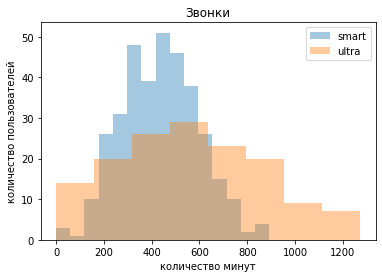

In [99]:
sns.distplot(smart['duration'], kde=False)
sns.distplot(ultra['duration'], kde=False)
plt.legend(['smart', 'ultra'])
plt.xlabel('количество минут')
plt.ylabel('количество пользователей')
plt.title('Звонки')

Text(0.5, 1.0, 'Сообщения')

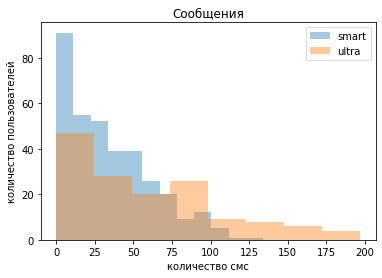

In [100]:
sns.distplot(smart['messages'], kde=False)
sns.distplot(ultra['messages'], kde=False)
plt.legend(['smart', 'ultra'])
plt.xlabel('количество смс')
plt.ylabel('количество пользователей')
plt.title('Сообщения')

Text(0.5, 1.0, 'траффик')

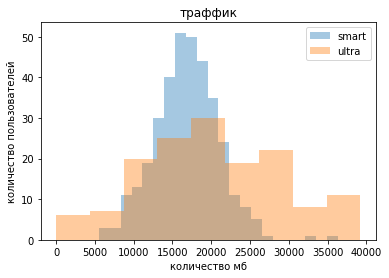

In [101]:
sns.distplot(smart['mb_used'], kde=False)
sns.distplot(ultra['mb_used'], kde=False)
plt.legend(['smart', 'ultra'])
plt.xlabel('количество мб')
plt.ylabel('количество пользователей')
plt.title('траффик')

Пользователи тарифа смарт ограничены лимитом гораздо больше, чем те кто перешел на ультра.

# Шаг 4. Проверка гипотез

- **средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**

H0 — Средняя выручка пользователей тарифов "Ультра" и "Смарт" равна

H1 — Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается

alpha = 5% - критический уровень статистической значимости

p-value -  вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, что нулевая гипотеза верна

In [102]:
#дисперсия платежей smart
smart['payment'].var().astype('int')

524719

In [103]:
#дисперсия платежей ultra
ultra['payment'].var().astype('int')

90191

In [122]:
#отвегнем гипотезу если вероятность p-value окажется меньше alpha 
alpha = 0.05 

#так как дисперсии тарифов сильно отличаются то параметр equal_var = False
results = st.ttest_ind(
    #smart['payment'],
    #ultra['payment'], , equal_var=False)
    #average_values.query('tariff == "smart"')['payment'], 
    #average_values.query('tariff == "ultra"')['payment'], equal_var=False)
    df.query('tariff == "smart"')['payment'], 
    df.query('tariff == "ultra"')['payment'], equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.7240946993530856e-246
Отвергаем нулевую гипотезу


Вероятность получить равную выручку стремится к нулю, отвергаем тезис, что: 
Средняя выручка пользователей тарифов "Ультра" и "Смарт" равна

По результату исследования средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

- **средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

H0 — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов

H1 — средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов

alpha = 5% - критический уровень статистической значимости

p-value -  вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, что нулевая гипотеза верна

In [124]:
moscow = average_values.query('city == "Москва"')
russia = average_values.query('city != "Москва"')

In [125]:
#отвегнем гипотезу если вероятность p-value окажется меньше alpha 
alpha = 0.05 

results = st.ttest_ind(
    moscow['payment'], 
    russia['payment'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.32344400088705527
Не получилось отвергнуть нулевую гипотезу


По результату исследования средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов

# Общий вывод

в результате статистического анализа было выявлено:
    - пользователи тарифа ультра платят в среднем - 2002, а пользователи смарта - 952
    - пользователей тарифа смарт почти в два раза больше чем тарифа ультра, тариф смарт гораздо дешевле.
    - тариф смарт не обладает большим лимитом и вынуждает своих держателей часто пополнять счет
    - доплат по тарифу ультра меньше, чем по смарту, но он все равно выгодней для оператора.